<a href="https://colab.research.google.com/github/8nkit/Image-Classification-MNIST/blob/master/Image_Classification_F_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
print(tf.__version__)

1.15.0


In [0]:
fashion_mnist=keras.datasets.fashion_mnist

In [0]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [0]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
len(train_labels)

60000

In [0]:
test_images.shape

In [23]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
len(test_labels)

10000

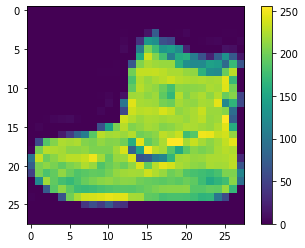

In [25]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0

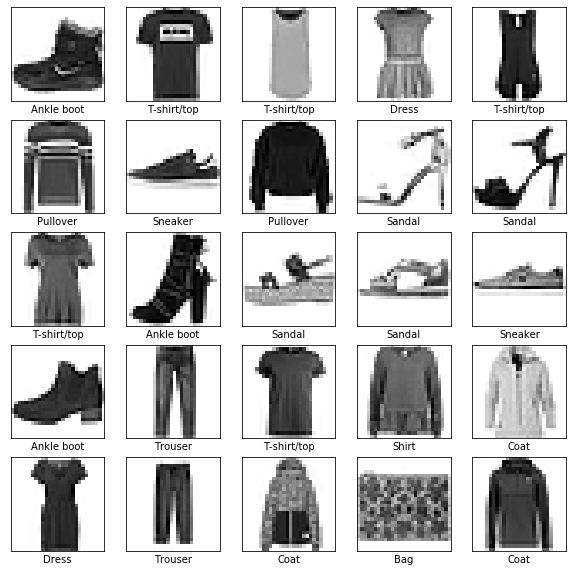

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [28]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation=tf.nn.relu),
                        keras.layers.Dense(10,activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4999 - acc: 0.8237
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3727 - acc: 0.8647
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3357 - acc: 0.8776
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3103 - acc: 0.8852
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2925 - acc: 0.8907
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2780 - acc: 0.8968
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2657 - acc: 0.9015
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2557 - acc: 0.9055
Epoch 9/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2436 - acc: 0.9099
Epoch 10/10
60000/60000 [==============================] - 

In [34]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Accuracy on Testing ',test_acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3257 - acc: 0.8865
Accuracy on Testing  0.8865


In [0]:
predictions=model.predict(test_images)

In [36]:
predictions[0]

array([4.1221793e-07, 1.3527394e-09, 3.1959516e-08, 5.9951759e-08,
       4.6375908e-09, 1.5914934e-03, 1.1317003e-07, 1.1857971e-02,
       1.9244062e-09, 9.8654985e-01], dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [41]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    

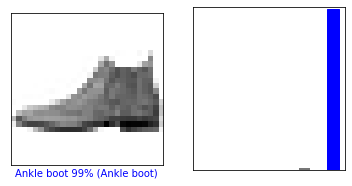

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)



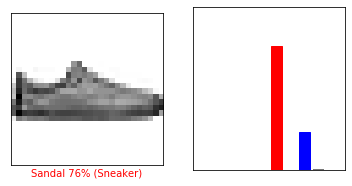

In [47]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

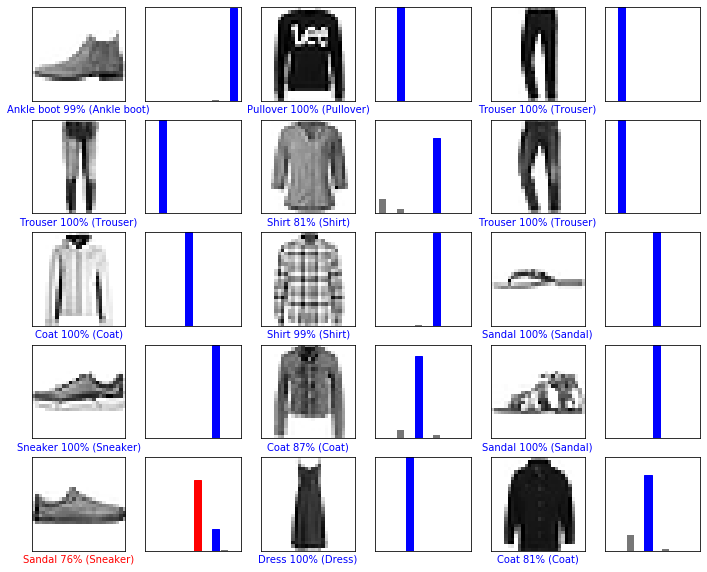

In [48]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [49]:
img = test_images[0]
print(img.shape)

(28, 28)


In [50]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


[[4.1221713e-07 1.3527341e-09 3.1959516e-08 5.9951532e-08 4.6375641e-09
  1.5914926e-03 1.1316982e-07 1.1857965e-02 1.9243949e-09 9.8654985e-01]]


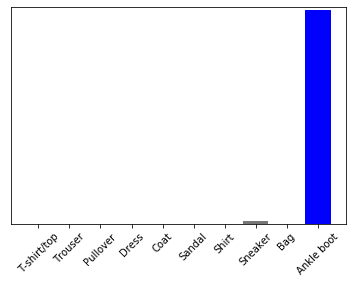

In [51]:
predictions_single = model.predict(img)
print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [52]:
np.argmax(predictions_single[0])

9